In [1]:
pip install colormath numpy pillow pandas

  Preparing metadata (setup.py) ... done
  Created wheel for colormath: filename=colormath-3.0.0-py3-none-any.whl size=39474 sha256=1c5c01ca1ceca51fc2dd360591e8961915686c3dd3c145943a4c7381e1706d1c
  Stored in directory: /home/sala/.cache/pip/wheels/9a/32/6a/605739a172d8112031c9875d744aef91709f00de9b3bbb9274
Successfully built colormath
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:



def load_munsell_data(file_path):
    """
    Load Munsell Renotation Data from a CSV file.
    """
    munsell_data = pd.read_csv(file_path)
    print("Loaded Munsell Data:")
    print(munsell_data.head())
    return munsell_data


   hue  value  chroma         r         g         b         L         A  \
0  10B    1.0       1  0.069966  0.102321  0.125645  8.766975 -1.873666   
1  10B    1.0       2  0.047615  0.104012  0.144154  8.752576 -2.435589   
2  10B    1.0       3  0.012557  0.106032  0.164007  8.734874 -3.121113   
3  10B    1.0       4  0.000000  0.108210  0.184417  9.105021 -1.903252   
4  10B    1.0       5  0.000000  0.110270  0.204285  9.653357  0.194611   

           B  
0  -5.355077  
1  -8.942874  
2 -12.765529  
3 -16.018042  
4 -18.828227  


In [ ]:

def generate_synthetic_patch(rgb, size=(100, 100), add_noise=False, noise_level=0.1):
    """
    Generate a synthetic soil patch from RGB values.
    
    Parameters:
        rgb (tuple): RGB values (r, g, b) in the range [0, 1].
        size (tuple): Size of the image patch (width, height).
        add_noise (bool): Whether to add random noise to the patch.
        noise_level (float): Level of noise to add (range 0-1).
    
    Returns:
        PIL.Image: Synthetic soil patch image.
    """
    # Ensure RGB values are in the range [0, 1]
    rgb = tuple(min(max(c, 0), 1) for c in rgb)
    
    # Create an image patch
    patch = np.ones((size[0], size[1], 3), dtype=np.uint8)
    patch[:, :, 0] = int(rgb[0] * 255)  # Red channel
    patch[:, :, 1] = int(rgb[1] * 255)  # Green channel
    patch[:, :, 2] = int(rgb[2] * 255)  # Blue channel
    
    # Add random noise if enabled
    if add_noise:
        noise = np.random.normal(0, noise_level * 255, patch.shape).astype(np.int16)
        patch = np.clip(patch + noise, 0, 255).astype(np.uint8)
    
    return Image.fromarray(patch)

In [ ]:

def visualize_synthetic_images(output_dir, num_images=6):
    """
    Visualize a few synthetic images.
    
    Parameters:
        output_dir (str): Directory containing the synthetic images.
        num_images (int): Number of images to display.
    """
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    for i, ax in enumerate(axes.flat):
        if i < min(num_images, len(os.listdir(output_dir))):
            img_path = os.path.join(output_dir, os.listdir(output_dir)[i])
            img = plt.imread(img_path)
            ax.imshow(img)
            ax.axis("off")
            ax.set_title(os.listdir(output_dir)[i])
    plt.tight_layout()
    plt.show()


Loaded Munsell Data:
   hue  value  chroma         r         g         b         L         A  \
0  10B    1.0       1  0.069966  0.102321  0.125645  8.766975 -1.873666   
1  10B    1.0       2  0.047615  0.104012  0.144154  8.752576 -2.435589   
2  10B    1.0       3  0.012557  0.106032  0.164007  8.734874 -3.121113   
3  10B    1.0       4  0.000000  0.108210  0.184417  9.105021 -1.903252   
4  10B    1.0       5  0.000000  0.110270  0.204285  9.653357  0.194611   

           B  
0  -5.355077  
1  -8.942874  
2 -12.765529  
3 -16.018042  
4 -18.828227  
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_1.png
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_2.png
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_3.png
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_4.png
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_5.png
Generated: /home/sala/data/synthetic_images/synthetic_10B_1.0_6.png
Generated: /home/sala/data/syn

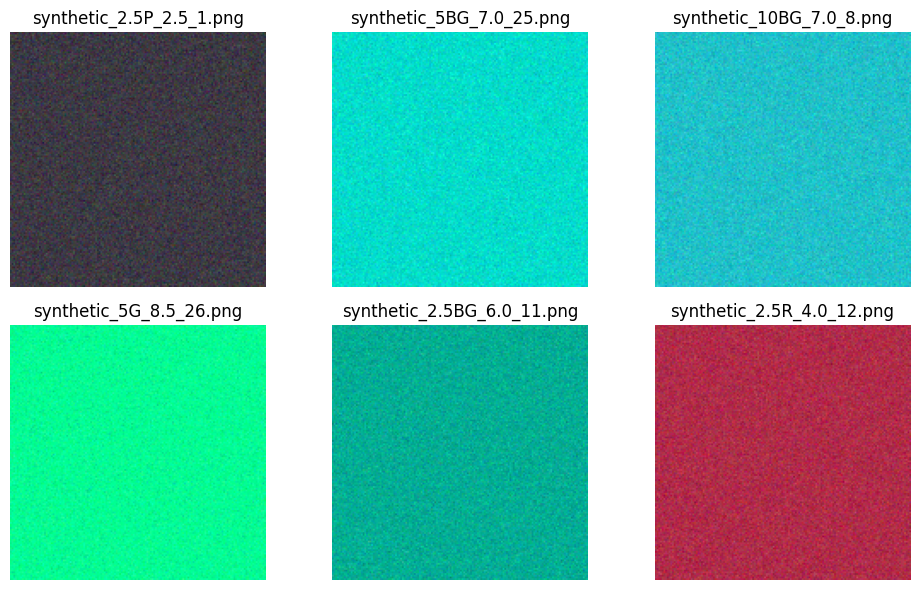

In [ ]:


if __name__ == "__main__":
    # Load Munsell data
    munsell_data = load_munsell_data("/home/sala/data/equivalent_munsell.csv")
    
    # Generate synthetic images
    generate_synthetic_images(
        munsell_data,
        output_dir="/home/sala/data/synthetic_images",
        size=(150, 150),  # Customize patch size
        add_noise=True,   # Enable noise for texture simulation
        noise_level=0.05  # Control noise intensity
    )
    
    # Visualize results
    visualize_synthetic_images("/home/sala/data/synthetic_images")